<a href="https://colab.research.google.com/github/decorouz/DeepLeaning-with-Tensorflow/blob/main/5_0_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5.0 Deep learning for computer vision

## 5.1 Introduction of Convolutional Neural Network (Convnets)



#### 5.1.1 Instantiating a small convnet

In [68]:
from keras import layers
from keras import models
import random

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)`.

In this case, we'll configure the convnet to process inputs of size `(28,28,1)` which is the format of the MNIST images.

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

The output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor.

The number of channels is controlled by the first argument passed to the `ConvD layers` (32 or 64).

#### 5.1.2 Adding a classifier on the top of the convnet

In [ ]:
# Adding a classifier on the top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

#### 5.1.3 Training the convnet on MNIST Images

In [ ]:
# Training the convnet on MNIST Images
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
import numpy as np

def to_one_hot(labels, dimension=10):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] += 1.
  return results

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

# custom vectorizer
# train_labels = to_one_hot(train_labels)
# test_labels = to_one_hot(test_labels)

# built in method
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, 
          train_labels, 
          epochs=5, 
          batch_size=64)

Epoch 1/5
938/938 [==============================] - 51s 54ms/step - loss: 0.1766 - accuracy: 0.9438
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0459 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 42s 44ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0194 - accuracy: 0.9939


In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
# Let's evaluate the model on the test_data
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.0273 - accuracy: 0.9911


In [ ]:
print(f"The test accuracy is {test_acc:.2f}")
print(f"The test loss on the test dataset is {test_loss:.2f}")

The test accuracy is 0.99
The test loss on the test dataset is 0.03


#### 5.1.4 The Convolution Operation

The **difference between** a densely connected layer and a convolution layer is this; Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns.

* The patterns they learn are translation invariant:
* They can learn spatial hierarchies of patterns

Convolutions operate over 3D tensors, called *feature maps* with two spatial axes (height and width) as well as depth (also called channels axis).

The convoluation operation extracts patches from its input feature map and applies the same transformation to all these patches, producing an output feature map.

The output feature map is still a 3D tensor; it has a width and a height. It depth can be abitrary, because the output depth is a paramter of the layer; it stands for filters.

In the MNIST example, the first convolution layer takes a feature map of size (28,28,1) and outputs a feature map of size (26,26,32): it computes 32 filters over its input. Each of these 32 output channels contain a 26*26 grid of values which is a *response map* of the filter over the input.

***Feature map***: every dimension in the depth axis is a feature, and the 2D tensors output [:,:,n] in the 2D spatial map of the response of this filter over the input.

Convolutions are defined by **two key parameters**:
* Size of the patches extracted from the inputs
* Depth of the output feature map

In Keras, 
```
Conv2D(output_depth, (window_height, window_width)
```

**Reason why the output width and height** may differ from input width and height.
* **Border effects** which can be countered by padding the input feature map:
* The use of *strides*: The distance between two successive windows is call strides. Using stride 2 means the width and height of the feature map are downsampled by a factor of 2. Instead to downsample feature maps, we tend to use *max-pooling*

#### 5.1.5 The max-pooling operation

The role of max pooling is aggressively downsample feature maps. It consist of extracting windows from the input feature maps and outputting the max value of each channel.

In [ ]:
# Why downsample feature maps

model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3,3), activation="relu",input_shape=(28,28,1)))
model_no_max_pool.add(layers.Conv2D(64, (3,3), activation="relu"))
model_no_max_pool.add(layers.Conv2D(64, (3,3), activation="relu"))

In [ ]:
model_no_max_pool.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


The reason to use downsampling is to reduce the number of **feature-map** coefficients to process, as well as to induce spatial-filter hierarcheis by making successive convolution layers look at increasingly large windows.

**What is feature maps?**: The basic idea of neural network is that neurons learn features from inputs.In CNN, the feature map is the output of one filter applied to the previous layer.

## 5.2 Training a convnet from scratch on a small dataset

Having a to train an image classification model using very little data is a common situation, which you'll likely encounter in practice.

* Train naively with the little data available.
* Data augmentation
* Feature extraction with a pretrained network
* Fine-tuning a pretrained network

#### 5.2.1 Downloading the data
The dataset is made available by Kaggle in late 2013. Yoou can download the original dataset from [here](www.kaggle.com/c/dogs-vs-cats/data).

This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, you’ll create a new
dataset containing three subsets: a training set with 1,000 samples of each class, a validation
set with 500 samples of each class, and a test set with 500 samples of each class.

In [2]:
# Importing the required packages
import os, shutil
import zipfile

In [3]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

--2023-02-12 19:08:19--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.84.128.198, 2600:1407:3c00:108a::317f, 2600:1407:3c00:10a1::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.84.128.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  80.6MB/s    in 7.7s    

2023-02-12 19:08:27 (102 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [4]:
# unzip the file
local_zip = "/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

In [50]:
source_path = "/tmp/PetImages"

source_path_dogs = os.path.join(source_path, "Dog")
source_path_cats = os.path.join(source_path, "Cat")

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

In [51]:
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


##### 5.2.1.1 Create train, validation and test directory

In [52]:


base_dir = "/tmp/cats_and_dogs"

# Empty directory to prevent FileExistError when the function is run several times
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)


def create_train_validation_test_dirs(root_dir):

  '''
  Create directory for train, validation and test images

  Args:
    root_dir(string): the base directory path to create subdirectories

  Returns
    None
  '''
  train_dir = os.path.join(root_dir, "train")             
  os.makedirs(train_dir)                                   # Dir for training
  validation_dir = os.path.join(root_dir, "validation")
  os.makedirs(validation_dir)                              # Dir for validation
  test_dir = os.path.join(root_dir, "test")
  os.makedirs(test_dir)                                    # Dir for testing

  # Directory with training cat images 
  train_cats_dir = os.path.join(train_dir, "cats")
  os.makedirs(train_cats_dir)

  # Directory with training dog images 
  train_dogs_dir = os.path.join(train_dir, "dogs")
  os.makedirs(train_dogs_dir)

  # Directory with validation cat images
  validation_cats_dir = os.path.join(validation_dir, "cats")
  os.makedirs(validation_cats_dir)

  # Directory with validation dog images 
  validation_dogs_dir = os.path.join(validation_dir, "dogs")
  os.makedirs(validation_dogs_dir)

  # Directory with testing cat images 
  test_cats_dir = os.path.join(test_dir, "cats")
  os.makedirs(test_cats_dir)

  # Directory with testing dog images
  test_dogs_dir = os.path.join(test_dir, "dogs")
  os.makedirs(test_dogs_dir)


In [53]:
# Test create_train_validation_test_dirs

try:
  create_train_validation_test_dirs(root_dir=base_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")



In [54]:

for root_dirs, dirs, files in os.walk(base_dir):
  for subdir in dirs:
    print(os.path.join(root_dirs, subdir))

/tmp/cats_and_dogs/train
/tmp/cats_and_dogs/validation
/tmp/cats_and_dogs/test
/tmp/cats_and_dogs/train/cats
/tmp/cats_and_dogs/train/dogs
/tmp/cats_and_dogs/validation/cats
/tmp/cats_and_dogs/validation/dogs
/tmp/cats_and_dogs/test/cats
/tmp/cats_and_dogs/test/dogs


##### 5.2.1.2 Copying images to training, validation and test directories

In [57]:
# Copying images to training, validation and test directories into split
import numpy as np
import random

def split_data(SOURCE_DATASET_DIR, TRAINING_DIR, VALIDATION_DIR, TEST_DIR, SPLIT_SIZE):
  # check for valid files in the directory
  valid_files = []
  for fname in os.listdir(SOURCE_DATASET_DIR):
    file_path = SOURCE_DATASET_DIR + fname
    if os.path.getsize(file_path) >0:
      valid_files.append(fname)
    else:
      print(f"{fname} is zero length, therefore ignoring ")

  num_valid_files = len(valid_files)

  shuffled_file = random.sample(valid_files, num_valid_files)         # shuffle the dataset
  train_split_point = int(num_valid_files * SPLIT_SIZE + 1)           # select only 1000 images for training


  train_set = shuffled_file[:train_split_point]                              # copies the first 1000 training images
  validation_set = valid_files[train_split_point: 1500]               # copies the next 500 images
  test_set = valid_files[1501 : 2001]                                 # copies the next 500 images

  

  for fname in train_set:
    source = os.path.join(SOURCE_DATASET_DIR, fname)
    train_destination = os.path.join(TRAINING_DIR, fname)
    shutil.copyfile(source, train_destination)

  for fname in validation_set:
    source = os.path.join(SOURCE_DATASET_DIR, fname)
    val_distination = os.path.join(VALIDATION_DIR, fname)
    shutil.copyfile(source, val_distination)

  for fname in test_set:
    source = os.path.join(SOURCE_DATASET_DIR, fname)
    test_distination = os.path.join(TEST_DIR, fname)
    shutil.copyfile(source, test_distination)


##### 5.2.1.3 Test Split function

In [59]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats_and_dogs/train/"
VALIDATION_DIR = "/tmp/cats_and_dogs/validation/"
TESTING_DIR = "/tmp/cats_and_dogs/test/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = 0.08                                   # Coping only 1000 copies of dog and cat images each.

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

666.jpg is zero length, therefore ignoring 
11702.jpg is zero length, therefore ignoring 


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 1000 images of cats for training
There are 1000 images of dogs for training
There are 500 images of cats for validation
There are 500 images of dogs for validation
There are 500 images of cats for testing
There are 500 images of dogs for testing


#### 5.4.2 Building the network

This is a classification problem, hence we will end up with single unit.

The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from 148 * 148 to 7 * 7).

In [60]:

from keras import models
from keras import layers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Let's look at how the dimension of the feature maps change with every successive layer

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [62]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

#### 5.4.3 Data Processing

Data should be formatted into appropiate preprocess floating point tensors before being fed into the network.

* Read the image files
* Decode the jpeg content to RGB grids pixesl
* Convert these into floating point tensors
* Rescale the pixels to [0,1] interval.


In [63]:
from keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 20

def generate_train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  
  

  train_datagen = ImageDataGenerator(rescale=1./255)
  val_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                      target_size=IMAGE_SIZE,
                                                      batch_size=BATCH_SIZE,
                                                      class_mode="binary")
  
  val_generator = val_datagen.flow_from_directory(VALIDATION_DIR,
                                                   target_size=IMAGE_SIZE,
                                                   batch_size=BATCH_SIZE,
                                                   class_mode="binary")
  
  return train_generator, val_generator


In [67]:
# Test the generators.
train_generator, val_generator = generate_train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Lets look at the output of one these generators. Note that the generator yileds these batchess indefinitely. For this reason, you need to break the iteration loop at some point

In [68]:
for image_batch, labels_batch in train_generator:
  print("data batch shape:", image_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


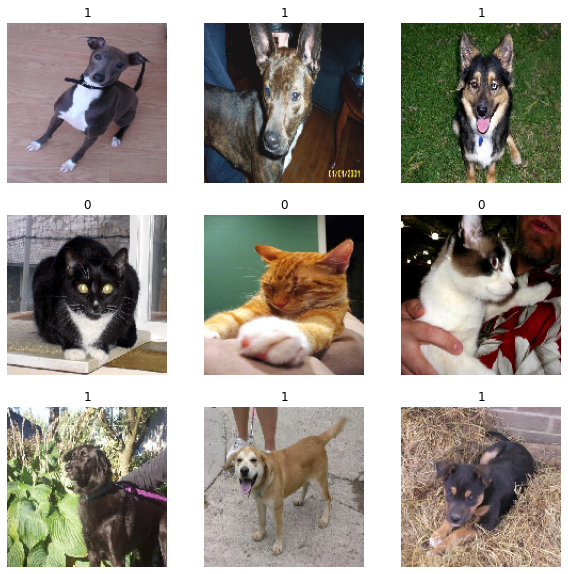

In [69]:
# Lets visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_generator:
  
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(int(labels[i]))
    plt.axis("off")
  break

#### 5.4.4 Fitting the model using a batch generator


`steps_per_epoch`: Keras model needs to now how many samples to draw from the generator before declaring an epoch over. After having drawn `steps_per_epoch` batches from the generator-- the fitting process will go the next epoch. In this case, btaches are 20samples, so it ill take 100 batches until you see your target of 2000 samples


In [70]:
train_generator.samples

2000

In [71]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch= train_generator.samples//20,
    epochs=20,
    validation_data=val_generator,
    validation_steps=50
)

Epoch 1/20


<ipython-input-71-63794bdd9348>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 11s 105ms/step - loss: 0.6887 - accuracy: 0.5170 - val_loss: 0.6663 - val_accuracy: 0.6190
Epoch 2/20
100/100 [==============================] - 9s 90ms/step - loss: 0.6597 - accuracy: 0.6090 - val_loss: 0.6391 - val_accuracy: 0.6470
Epoch 3/20
100/100 [==============================] - 10s 103ms/step - loss: 0.6252 - accuracy: 0.6490 - val_loss: 0.6276 - val_accuracy: 0.6540
Epoch 4/20
100/100 [==============================] - 11s 106ms/step - loss: 0.5866 - accuracy: 0.6905 - val_loss: 0.5803 - val_accuracy: 0.6870
Epoch 5/20
100/100 [==============================] - 11s 107ms/step - loss: 0.5576 - accuracy: 0.7100 - val_loss: 0.5588 - val_accuracy: 0.6980
Epoch 6/20
100/100 [==============================] - 9s 90ms/step - loss: 0.5295 - accuracy: 0.7345 - val_loss: 0.5354 - val_accuracy: 0.7220
Epoch 7/20
100/100 [==============================] - 10s 103ms/step - loss: 0.4995 - accuracy: 0.7575 - val_loss: 0.5680 - val_accuracy: 0.6990


In [72]:
# Saving the model
model.save("cats_and_dogs_small_1.h5")

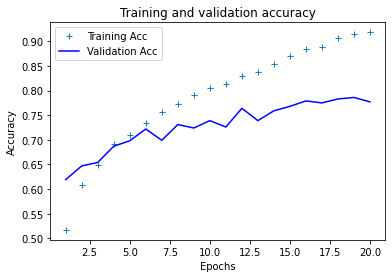

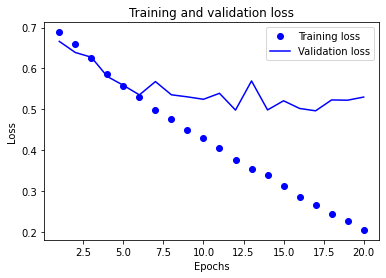

In [73]:
# Displaying curves of loss and accuracy during training
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, "+", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

These plots are characteristics of overfitting. The training accuracy increases linearly over time, whereas the validation accuracy stalls at 70-75%.


####5.4.5 Using Data Augmentation

Overfitting is caused by having too few to learn from. Data augmentation takes the approach of generating more training data from existing training samples by *augmenting* samples via a number of random transformations.

In [74]:
##### 5.4.5.1 Setting up data augmentation configuration via IMageDataGenerator

In [75]:
datagen = ImageDataGenerator(
    rotation_range =40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [76]:
## Displaying some randomly augmented training images

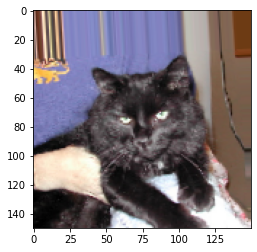

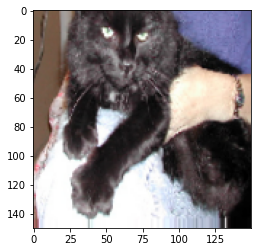

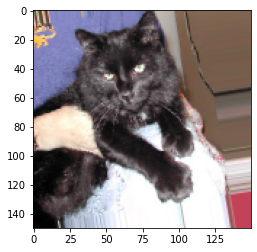

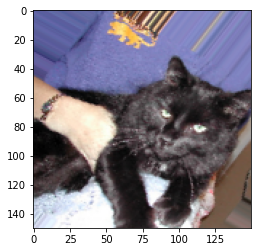

In [77]:
import keras.utils as image

fnames = [os.path.join(TRAINING_CATS_DIR, fname) for fname in os.listdir(TRAINING_CATS_DIR)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

i=0

for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break
plt.show()

Note: When you train a new network using data -augmentation configuration,  the netowkr will never see the same input twice

In [78]:
# Defining a new convnet that includes dropout

In [79]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"])



In [80]:
# Training the Convnet using Augmentation generators
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 128)       36992     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [81]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")
validation_generator = test_datagen.flow_from_directory(VALIDATION_DIR,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode="binary")



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [83]:
# Callback
from keras.callbacks import ModelCheckpoint

filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor="val_loss",
                             save_best_only=True,
                             mode="min")

In [85]:
callbacks = [checkpoint]
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples/32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/32,
    callbacks=callbacks
)

<ipython-input-85-2411b274b03e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
62/62 [==============================] - 21s 307ms/step - loss: 0.7156 - accuracy: 0.5230 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 2/100
62/62 [==============================] - 21s 338ms/step - loss: 0.6871 - accuracy: 0.5405 - val_loss: 0.6745 - val_accuracy: 0.5250
Epoch 3/100
62/62 [==============================] - 19s 300ms/step - loss: 0.6827 - accuracy: 0.5585 - val_loss: 0.6590 - val_accuracy: 0.6380
Epoch 4/100
62/62 [==============================] - 21s 339ms/step - loss: 0.6662 - accuracy: 0.6080 - val_loss: 0.6557 - val_accuracy: 0.6190
Epoch 5/100
62/62 [==============================] - 20s 319ms/step - loss: 0.6692 - accuracy: 0.5840 - val_loss: 0.6263 - val_accuracy: 0.6620
Epoch 6/100
62/62 [==============================] - 18s 291ms/step - loss: 0.6431 - accuracy: 0.6290 - val_loss: 0.6539 - val_accuracy: 0.5870
Epoch 7/100
62/62 [==============================] - 20s 319ms/step - loss: 0.6486 - accuracy: 0.6355 - val_loss: 0.5997 - val_accuracy:

####5.4.6 Displaying curves of loss and accuracy during training

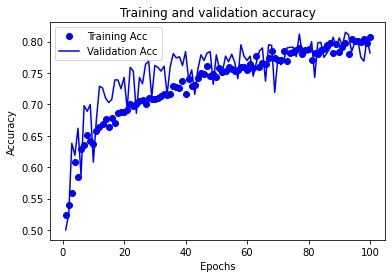

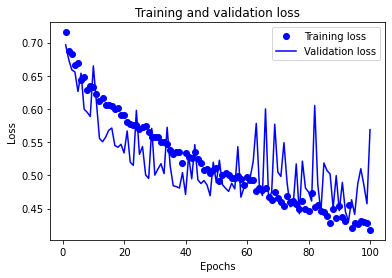

In [86]:

history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

####5.4.7 Evaluate and Save Model

In [87]:
model.save("cats_and_dogs_small_2.h5")
 # After fitting we can load our model for evaluation at it's best performing epoch
# model = keras.models.load_model(filepath)

In [90]:
print("Train Accuracy:{:.3f}".format(history.history['accuracy'][-1]))
print("Test Accuracy:{:.3f}".format(history.history['val_accuracy'][-1]))


Train Accuracy:0.808
Test Accuracy:0.782


By using regularization techniques, and by turning the networks parameters, I was able to get an even ebtter accuracy of close to 82%.

## 5.3 Using a pretrained convnet


A common and highly effective approach to deep learning on small image datasets is to use a pretrained network. A pretrained is a saved network that was previously trained on a large dataset.

VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014; it's a simple and widely used convent for ImageNet.

There are two ways to use a pretrained network: *feature extraction* and *fine-tuning*

Other model architecture:
* VGG
* ResNNet
* Inception
* Inception-ResNet
* Xception
* Unet

### 5.3.1 Feature Extraction
Feature extraction consists of using the representation learned by a previous network to extract interesting features from new samples. This feature are the run through a new classifier, which is trained from scratch.

Note:The level of generality of the representations extracted by specific convolution layers depends on the depth of the layer in the model.
Layers that come earlier in the model extract local, highly generic feature maps, whereas layers that are higher up extracts more abstract concepts.



In [91]:
# Instantiating the VGG16 convolutional base

In [92]:
from keras.applications import VGG16

conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


**weight**: the weight checkpoint from which to initialize the model

**include_top**: refers to including the densely connected classifier on the top of the network.

**input_shape**: the shape of the image tensors that you'll feed to the network.


In [93]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#### 5.3.1 Fast Feature Extraction without Data Augmentation

 Begin by running instances of the previously introduced ImageDataGenerator to extract images as Numpy arrays as well as their labels. Extract features from this images by calling `predict` method of the `conv_base` model

In [94]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

BASE_DIR = "/tmp/cats_and_dogs"
TRAINING_DIR = os.path.join(BASE_DIR, "train")
VALIDATION_DIR = os.path.join(BASE_DIR, "validation")
TEST_DIR = os.path.join(BASE_DIR, "test")

TARGET_SIZE = (150,150)
datagen = ImageDataGenerator(rescale=1.0/255)
batch_size = 20


def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4,4,512))
  labels = np.zeros(shape=(sample_count,))
  generator = datagen.flow_from_directory(directory,
                                          target_size=TARGET_SIZE,
                                          batch_size=batch_size,
                                          class_mode="binary")
  
  index = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[index * batch_size: (index + 1) * batch_size] = features_batch
    labels[index * batch_size: (index + 1)* batch_size] = labels_batch

    index+=1
    if index * batch_size >= sample_count:
      break
  return features, labels


train_features, train_labels = extract_features(TRAINING_DIR, 2000)
validation_features, validation_labels = extract_features(VALIDATION_DIR, 1000)
test_features, test_labels = extract_features(TEST_DIR, 1000)



Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 27ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 35ms/step


The extracted features are currenly of shape `(samples, 4, 4, 512)`. I will feed them to a densely connected classifier, flatten them  to `(samples, 8192)`.

In [95]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

##### 5.3.1.1 Defining and training the densely connected classifier

In [96]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.00002),
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [97]:
history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    validation_data=(validation_features,validation_labels))

Epoch 1/30
63/63 [==============================] - 1s 10ms/step - loss: 0.6308 - accuracy: 0.6580 - val_loss: 0.4762 - val_accuracy: 0.8180
Epoch 2/30
63/63 [==============================] - 0s 7ms/step - loss: 0.4863 - accuracy: 0.7675 - val_loss: 0.3868 - val_accuracy: 0.8660
Epoch 3/30
63/63 [==============================] - 0s 7ms/step - loss: 0.4026 - accuracy: 0.8280 - val_loss: 0.3429 - val_accuracy: 0.8790
Epoch 4/30
63/63 [==============================] - 0s 7ms/step - loss: 0.3603 - accuracy: 0.8390 - val_loss: 0.3137 - val_accuracy: 0.8810
Epoch 5/30
63/63 [==============================] - 0s 8ms/step - loss: 0.3269 - accuracy: 0.8560 - val_loss: 0.2977 - val_accuracy: 0.8850
Epoch 6/30
63/63 [==============================] - 0s 8ms/step - loss: 0.3039 - accuracy: 0.8735 - val_loss: 0.2833 - val_accuracy: 0.8900
Epoch 7/30
63/63 [==============================] - 0s 7ms/step - loss: 0.2904 - accuracy: 0.8815 - val_loss: 0.2755 - val_accuracy: 0.8910
Epoch 8/30
63/63 [=

##### 5.3.1.1 Plotting the results

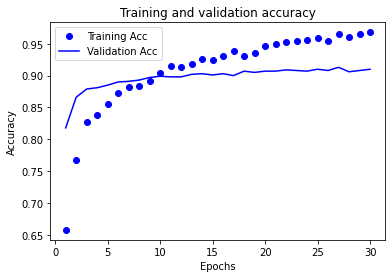

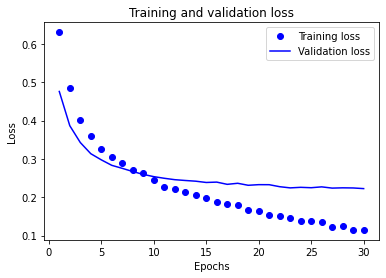

In [98]:

import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [99]:
print("Train Accuracy:{:.3f}".format(history.history['accuracy'][-1]))
print("Test Accuracy:{:.3f}".format(history.history['val_accuracy'][-1]))

Train Accuracy:0.968
Test Accuracy:0.910


#### 5.3.2 Feature Extraction with Data Augmentation

In [100]:
# Adding a densely connectd classifier on top of the convolutional base

In [101]:

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before you compile and train the model, its very importatnt to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being updated during training.

In [102]:
print("This is the number of training weight before freezing the conv base:", len(model.trainable_weights))
conv_base.trainable = False
print("This is the number of training weight after freezing the conv base:", len(model.trainable_weights))

This is the number of training weight before freezing the conv base: 30
This is the number of training weight after freezing the conv base: 4


In [103]:
# Training the model end to end with a froozen convolutional base

In [104]:
from keras import optimizers

IMAGE_SIZE=(150,150)
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size=IMAGE_SIZE,
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(VALIDATION_DIR,
                                                        target_size=IMAGE_SIZE,
                                                        batch_size=20,
                                                        class_mode="binary")

model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=["acc"])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-104-644a2b92f066>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
100/100 [==============================] - 22s 202ms/step - loss: 0.6129 - acc: 0.6760 - val_loss: 0.4592 - val_acc: 0.8050
Epoch 2/30
100/100 [==============================] - 22s 216ms/step - loss: 0.5030 - acc: 0.7630 - val_loss: 0.3711 - val_acc: 0.8360
Epoch 3/30
100/100 [==============================] - 20s 200ms/step - loss: 0.4463 - acc: 0.7965 - val_loss: 0.3316 - val_acc: 0.8660
Epoch 4/30
100/100 [==============================] - 21s 206ms/step - loss: 0.4230 - acc: 0.8065 - val_loss: 0.3098 - val_acc: 0.8700
Epoch 5/30
100/100 [==============================] - 20s 198ms/step - loss: 0.3987 - acc: 0.8160 - val_loss: 0.2866 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 21s 207ms/step - loss: 0.3862 - acc: 0.8310 - val_loss: 0.2783 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 20s 199ms/step - loss: 0.3708 - acc: 0.8315 - val_loss: 0.2693 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 2

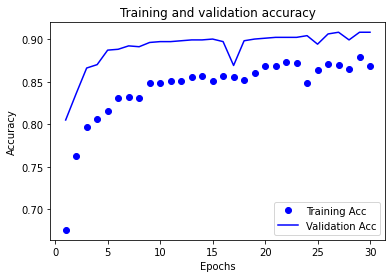

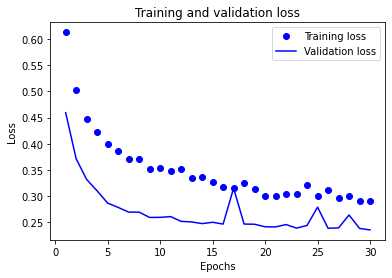

Train Accuracy:0.868
Validation Accuracy:0.908


In [105]:
history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("Train Accuracy:{:.3f}".format(history.history['acc'][-1]))
print("Validation Accuracy:{:.3f}".format(history.history['val_acc'][-1]))

We reached a validation accuracy of 89 %. Upon initial training, the training accuracy decrease while the test accuracy increaed by a couple of points.

### 5.3.2 Fine-tuning

Fine-tuning consists of unfreezing a few of the top laters of a frozen model base used for feature extraction, and jointly training both the newly added part of the model and the top layers.

* Add your custom network on top of an already-trained base network.
* Freeze the base network
* Train the part you added
* Unfreeze some layers in the base network
* Jointly train both these layers and the part you added

In [106]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Fine-tune the last three layers, which means all layers up to `block4_pool` should be frozen and the layers `block5_conv1`, `block5_conv2`, and
`block5_conv3` should be trainable

In [107]:
# Freezing all layers up to a specific one

In [108]:
conv_base.trainable= True

set_trainable = False

for layer in conv_base.layers:
  if layer.name =="block5_conv1":
    set_trainable= True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = True

In [109]:
# Fine-tuning the model

In [110]:
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=["acc"])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100


<ipython-input-110-bdc5bdbf201c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 29s 251ms/step - loss: 0.3069 - acc: 0.8755 - val_loss: 0.2092 - val_acc: 0.9190
Epoch 2/100
100/100 [==============================] - 25s 246ms/step - loss: 0.2141 - acc: 0.9060 - val_loss: 0.2466 - val_acc: 0.9130
Epoch 3/100
100/100 [==============================] - 24s 241ms/step - loss: 0.1656 - acc: 0.9330 - val_loss: 0.1167 - val_acc: 0.9460
Epoch 4/100
100/100 [==============================] - 24s 242ms/step - loss: 0.1390 - acc: 0.9415 - val_loss: 0.1312 - val_acc: 0.9550
Epoch 5/100
100/100 [==============================] - 25s 248ms/step - loss: 0.1294 - acc: 0.9460 - val_loss: 0.1193 - val_acc: 0.9550
Epoch 6/100
100/100 [==============================] - 25s 249ms/step - loss: 0.1104 - acc: 0.9545 - val_loss: 0.1009 - val_acc: 0.9620
Epoch 7/100
100/100 [==============================] - 25s 245ms/step - loss: 0.1016 - acc: 0.9630 - val_loss: 0.1298 - val_acc: 0.9570
Epoch 8/100
100/100 [==============================] - 24s 2

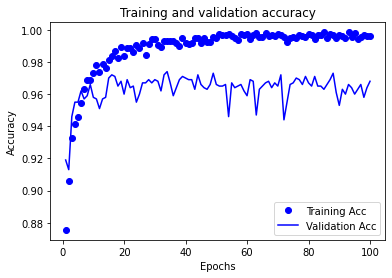

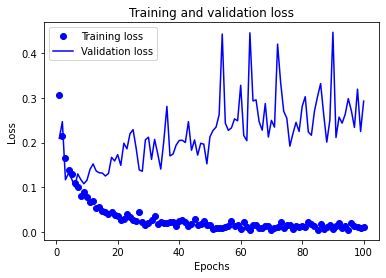

Train Accuracy:0.996
Validation Accuracy:0.968


In [111]:
history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("Train Accuracy:{:.3f}".format(history.history['acc'][-1]))
print("Validation Accuracy:{:.3f}".format(history.history['val_acc'][-1]))

In [112]:
# Smoothing the plots

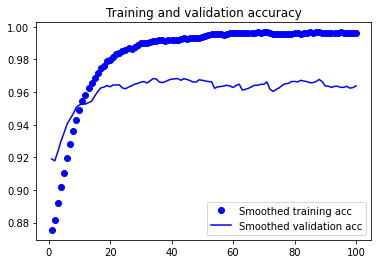

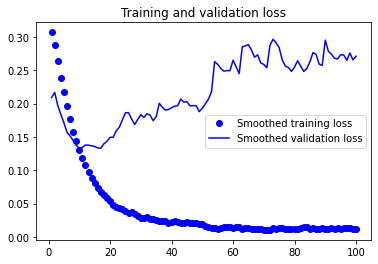

In [113]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


plt.plot(epochs,
         smooth_curve(acc), 
         'bo', 
         label='Smoothed training acc')

plt.plot(epochs,
         smooth_curve(val_acc), 'b', 
         label='Smoothed validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 
         'bo', 
         label='Smoothed training loss')

plt.plot(epochs,
         smooth_curve(val_loss), 'b', 
         label='Smoothed validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [114]:
# Evaluate the model on the test data

In [115]:
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=20,
                                                  class_mode="binary")

test_loss, test_acc, = model.evaluate_generator(test_generator,
                                                steps=50)

print("test acc:", test_acc)

Found 1000 images belonging to 2 classes.


<ipython-input-115-8b35935ca90b>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc, = model.evaluate_generator(test_generator,


test acc: 0.9750000238418579


Here we get a test accuracy of 97%.